In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Step 1: Understand the Dataset Structure
df=pd.read_csv('/content/drive/My Drive/companies.csv')
df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [ ]:
# Step 2: Drop Unnecessary Columns
columns_to_drop = ['Unnamed: 0.1', 'created_by', 'created_at', 'updated_at',
                   'logo_url', 'logo_width', 'logo_height', 'overview', 'permalink']

# Check which columns exist in the dataframe before dropping
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df = df.drop(columns=existing_columns_to_drop)
print("Columns dropped successfully.")
display(df.head())

Columns dropped successfully.


,id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,domain,homepage_url,...,country_code,state_code,city,region,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,c:1,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,wetpaint-inc.com,http://wetpaint-inc.com,...,USA,WA,Seattle,Seattle,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
1,c:10,Company,10,Flektor,flektor,games_video,acquired,NaT,flektor.com,http://www.flektor.com,...,USA,CA,Culver City,Los Angeles,NaT,NaT,NaN,6.0,34.021122,-118.396467
2,c:100,Company,100,There,there,games_video,acquired,NaT,there.com,http://www.there.com,...,USA,CA,San Mateo,SF Bay,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525
3,c:10000,Company,10000,MYWEBBO,mywebbo,network_hosting,operating,2008-07-26,mywebbo.com,http://www.mywebbo.com,...,Unknown,Unknown,Unknown,unknown,NaT,NaT,NaN,NaN,NaN,NaN
4,c:10001,Company,10001,THE Movie Streamer,the movie streamer,games_video,operating,2008-07-26,themoviestreamer.com,http://themoviestreamer.com,...,Unknown,Unknown,Unknown,unknown,NaT,NaT,NaN,NaN,NaN,NaN


In [ ]:
# Step 3a: Handle Missing Values in Critical Columns
df.dropna(subset=['name', 'status'], inplace=True)
print("Rows with missing 'name' or 'status' dropped.")
display(df.head())

Rows with missing 'name' or 'status' dropped.


,id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,domain,homepage_url,...,country_code,state_code,city,region,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,c:1,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,wetpaint-inc.com,http://wetpaint-inc.com,...,USA,WA,Seattle,Seattle,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
1,c:10,Company,10,Flektor,flektor,games_video,acquired,NaT,flektor.com,http://www.flektor.com,...,USA,CA,Culver City,Los Angeles,NaT,NaT,NaN,6.0,34.021122,-118.396467
2,c:100,Company,100,There,there,games_video,acquired,NaT,there.com,http://www.there.com,...,USA,CA,San Mateo,SF Bay,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525
3,c:10000,Company,10000,MYWEBBO,mywebbo,network_hosting,operating,2008-07-26,mywebbo.com,http://www.mywebbo.com,...,Unknown,Unknown,Unknown,unknown,NaT,NaT,NaN,NaN,NaN,NaN
4,c:10001,Company,10001,THE Movie Streamer,the movie streamer,games_video,operating,2008-07-26,themoviestreamer.com,http://themoviestreamer.com,...,Unknown,Unknown,Unknown,unknown,NaT,NaT,NaN,NaN,NaN,NaN


In [ ]:
# Step 3b: Handle Missing Values in Descriptive and Location Fields
descriptive_cols = ['description', 'short_description']
location_cols = ['country_code', 'state_code', 'city', 'region']

# Fill missing descriptive fields
for col in descriptive_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Not Provided')

# Fill missing location fields
for col in location_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

print("Missing values in descriptive and location fields handled.")
display(df.head())

Missing values in descriptive and location fields handled.


,id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,domain,homepage_url,...,country_code,state_code,city,region,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,c:1,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,wetpaint-inc.com,http://wetpaint-inc.com,...,USA,WA,Seattle,Seattle,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
1,c:10,Company,10,Flektor,flektor,games_video,acquired,NaT,flektor.com,http://www.flektor.com,...,USA,CA,Culver City,Los Angeles,NaT,NaT,NaN,6.0,34.021122,-118.396467
2,c:100,Company,100,There,there,games_video,acquired,NaT,there.com,http://www.there.com,...,USA,CA,San Mateo,SF Bay,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525
3,c:10000,Company,10000,MYWEBBO,mywebbo,network_hosting,operating,2008-07-26,mywebbo.com,http://www.mywebbo.com,...,Unknown,Unknown,Unknown,unknown,NaT,NaT,NaN,NaN,NaN,NaN
4,c:10001,Company,10001,THE Movie Streamer,the movie streamer,games_video,operating,2008-07-26,themoviestreamer.com,http://themoviestreamer.com,...,Unknown,Unknown,Unknown,unknown,NaT,NaT,NaN,NaN,NaN,NaN


In [ ]:
# Step 3c: Handle Dates
date_cols = ['founded_at', 'first_funding_at', 'last_milestone_at', 'first_milestone_at']

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

print("Date columns converted and invalid dates handled.")
display(df.head())

Date columns converted and invalid dates handled.


,id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,domain,homepage_url,...,country_code,state_code,city,region,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,c:1,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,wetpaint-inc.com,http://wetpaint-inc.com,...,USA,WA,Seattle,Seattle,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
1,c:10,Company,10,Flektor,flektor,games_video,acquired,NaT,flektor.com,http://www.flektor.com,...,USA,CA,Culver City,Los Angeles,NaT,NaT,NaN,6.0,34.021122,-118.396467
2,c:100,Company,100,There,there,games_video,acquired,NaT,there.com,http://www.there.com,...,USA,CA,San Mateo,SF Bay,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525
3,c:10000,Company,10000,MYWEBBO,mywebbo,network_hosting,operating,2008-07-26,mywebbo.com,http://www.mywebbo.com,...,Unknown,Unknown,Unknown,unknown,NaT,NaT,NaN,NaN,NaN,NaN
4,c:10001,Company,10001,THE Movie Streamer,the movie streamer,games_video,operating,2008-07-26,themoviestreamer.com,http://themoviestreamer.com,...,Unknown,Unknown,Unknown,unknown,NaT,NaT,NaN,NaN,NaN,NaN


In [ ]:
# Step 4: Correct Data Types

# Identify numeric columns and convert them to appropriate numeric types
numeric_cols = ['funding_total_usd', 'investment_rounds', 'ROI', 'milestones', 'relationships', 'lat', 'lng']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Identify categorical and text columns and convert them to string type
text_cols = ['id', 'entity_type', 'name', 'normalized_name', 'category_code', 'status',
             'domain', 'homepage_url', 'twitter_username', 'country_code', 'state_code',
             'city', 'region', 'description', 'short_description']

for col in text_cols:
     if col in df.columns:
        df[col] = df[col].astype(str)

print("Data types corrected.")
display(df.dtypes)

Data types corrected.


,0
id,object
entity_type,object
entity_id,int64
name,object
normalized_name,object
category_code,object
status,object
founded_at,datetime64[ns]
domain,object
homepage_url,object


In [ ]:
# Step 5: Geographical Coordinates

# Check for invalid coordinates (e.g., outside of typical ranges)
# A simple check for values outside of -90 to 90 for latitude and -180 to 180 for longitude
invalid_lat = df[(df['lat'] < -90) | (df['lat'] > 90)]
invalid_lng = df[(df['lng'] < -180) | (df['lng'] > 180)]

if not invalid_lat.empty:
    print(f"Found {len(invalid_lat)} rows with invalid latitude values.")
    # Option 1: Remove rows with invalid coordinates
    # df.drop(invalid_lat.index, inplace=True)
    # Option 2: Flag invalid coordinates (e.g., set to NaN)
    df.loc[invalid_lat.index, 'lat'] = np.nan
    print("Invalid latitude values have been set to NaN.")

if not invalid_lng.empty:
    print(f"Found {len(invalid_lng)} rows with invalid longitude values.")
    # Option 1: Remove rows with invalid coordinates
    # df.drop(invalid_lng.index, inplace=True)
    # Option 2: Flag invalid coordinates (e.g., set to NaN)
    df.loc[invalid_lng.index, 'lng'] = np.nan
    print("Invalid longitude values have been set to NaN.")

print("Geographical coordinates checked.")
display(df.head())

Geographical coordinates checked.


,id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,domain,homepage_url,...,country_code,state_code,city,region,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,c:1,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,wetpaint-inc.com,http://wetpaint-inc.com,...,USA,WA,Seattle,Seattle,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
1,c:10,Company,10,Flektor,flektor,games_video,acquired,NaT,flektor.com,http://www.flektor.com,...,USA,CA,Culver City,Los Angeles,NaT,NaT,NaN,6.0,34.021122,-118.396467
2,c:100,Company,100,There,there,games_video,acquired,NaT,there.com,http://www.there.com,...,USA,CA,San Mateo,SF Bay,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525
3,c:10000,Company,10000,MYWEBBO,mywebbo,network_hosting,operating,2008-07-26,mywebbo.com,http://www.mywebbo.com,...,Unknown,Unknown,Unknown,unknown,NaT,NaT,NaN,NaN,NaN,NaN
4,c:10001,Company,10001,THE Movie Streamer,the movie streamer,games_video,operating,2008-07-26,themoviestreamer.com,http://themoviestreamer.com,...,Unknown,Unknown,Unknown,unknown,NaT,NaT,NaN,NaN,NaN,NaN


In [ ]:
# Step 6: Save the Cleaned Data
output_path = '/content/drive/My Drive/cleaned_companies.csv'
df.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")

Cleaned data saved to /content/drive/My Drive/cleaned_companies.csv


# Task
Analyze the cleaned startup data by visualizing the distribution of company status, category code, geographical location, funding trends, and relationships/milestones, and then summarize the key insights from these visualizations.

## Analyze company status distribution

### Subtask:
Visualize the distribution of company statuses (e.g., operating, acquired, closed) to understand the proportion of companies in different stages.


**Reasoning**:
Use a countplot to visualize the distribution of company statuses and improve readability by rotating x-axis labels.



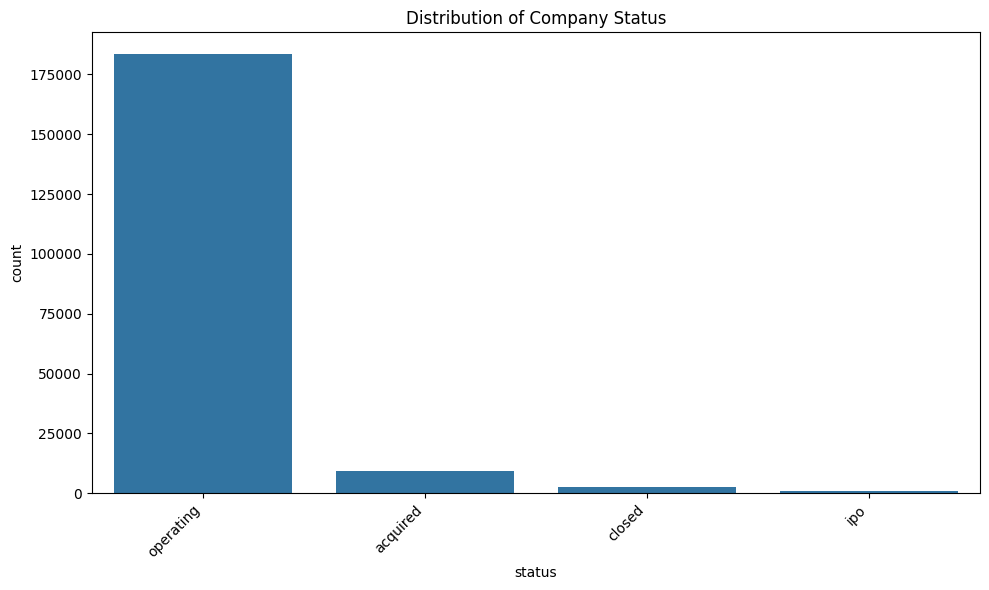

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status')
plt.title('Distribution of Company Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Explore category code distribution

### Subtask:
Visualize the distribution of company category codes to identify the most common industries or sectors represented in the dataset.


**Reasoning**:
Create a countplot to visualize the distribution of company category codes.



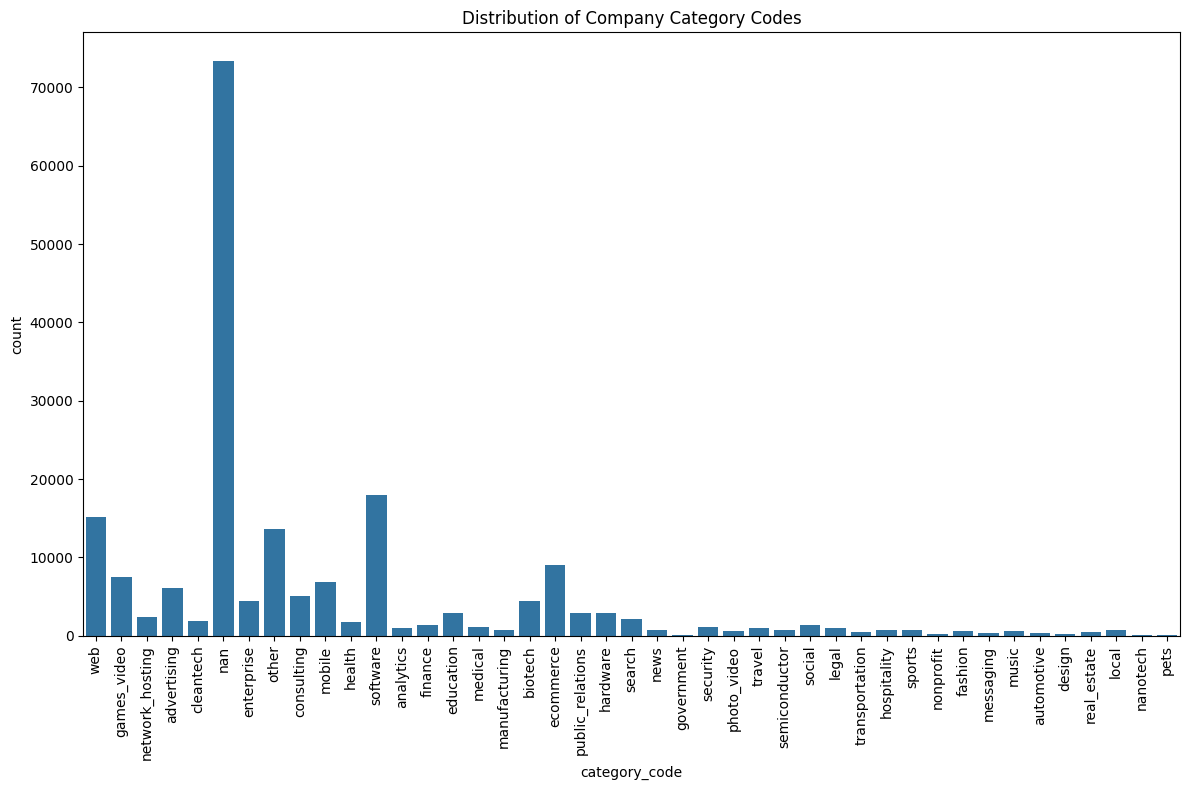

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='category_code')
plt.title('Distribution of Company Category Codes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Visualize geographical distribution

### Subtask:
Create visualizations (e.g., bar plots, maps if possible) to show the distribution of companies across countries, states, and cities.


**Reasoning**:
Generate countplots for the distribution of companies across countries, states, and cities, rotating the x-axis labels for readability and adjusting the layout.



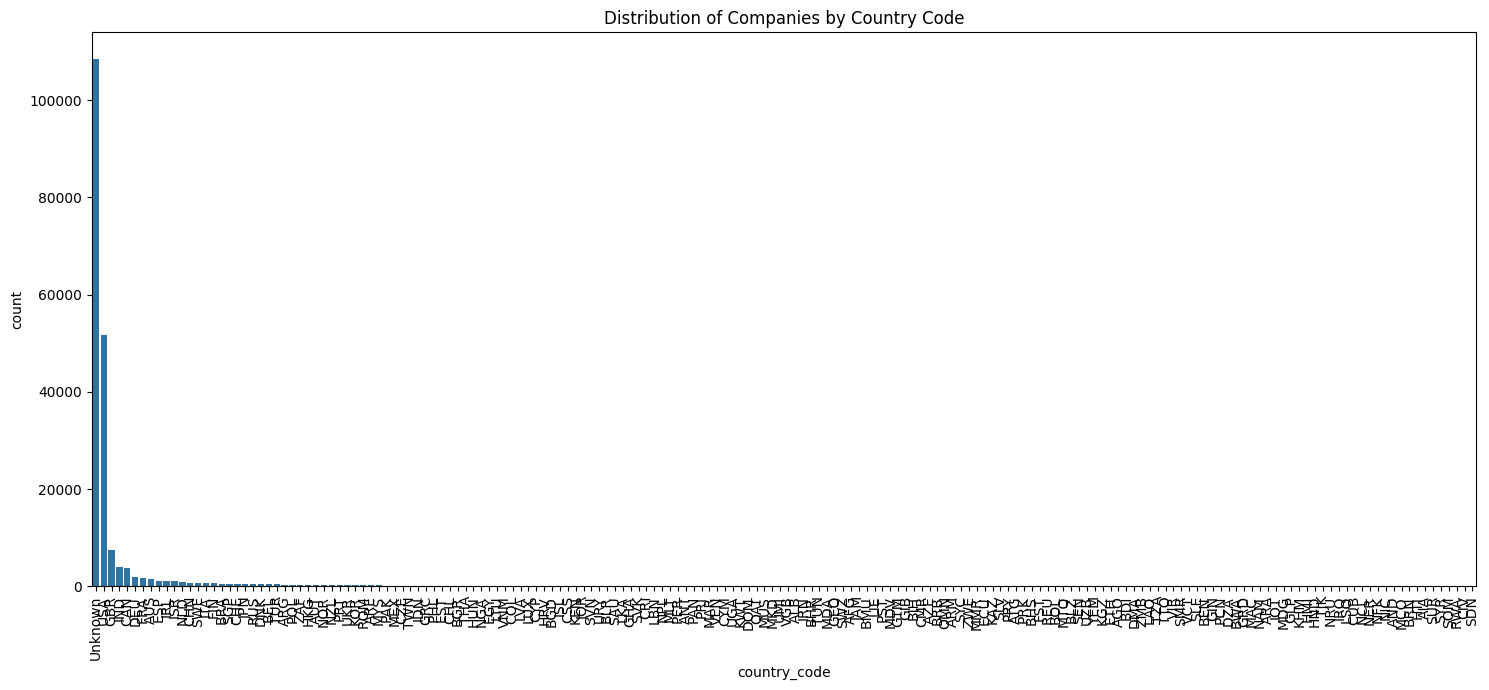

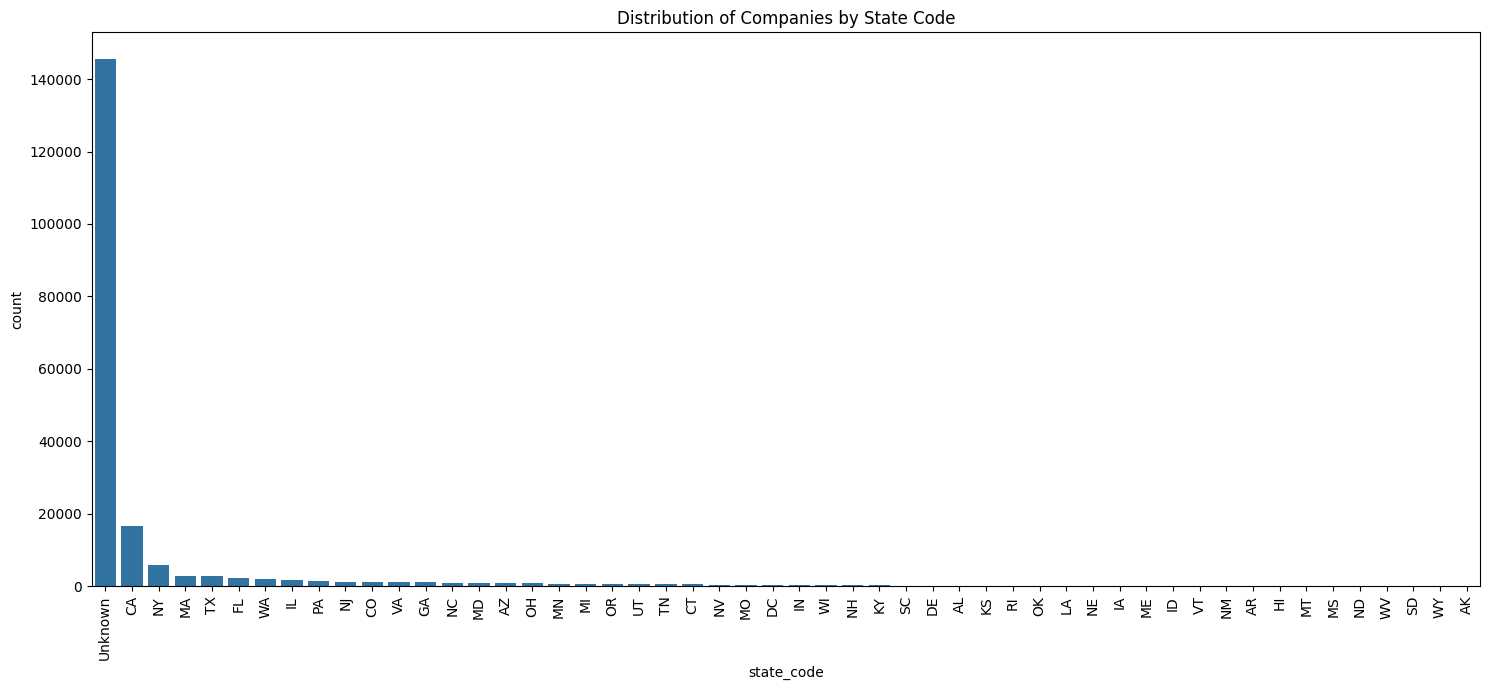

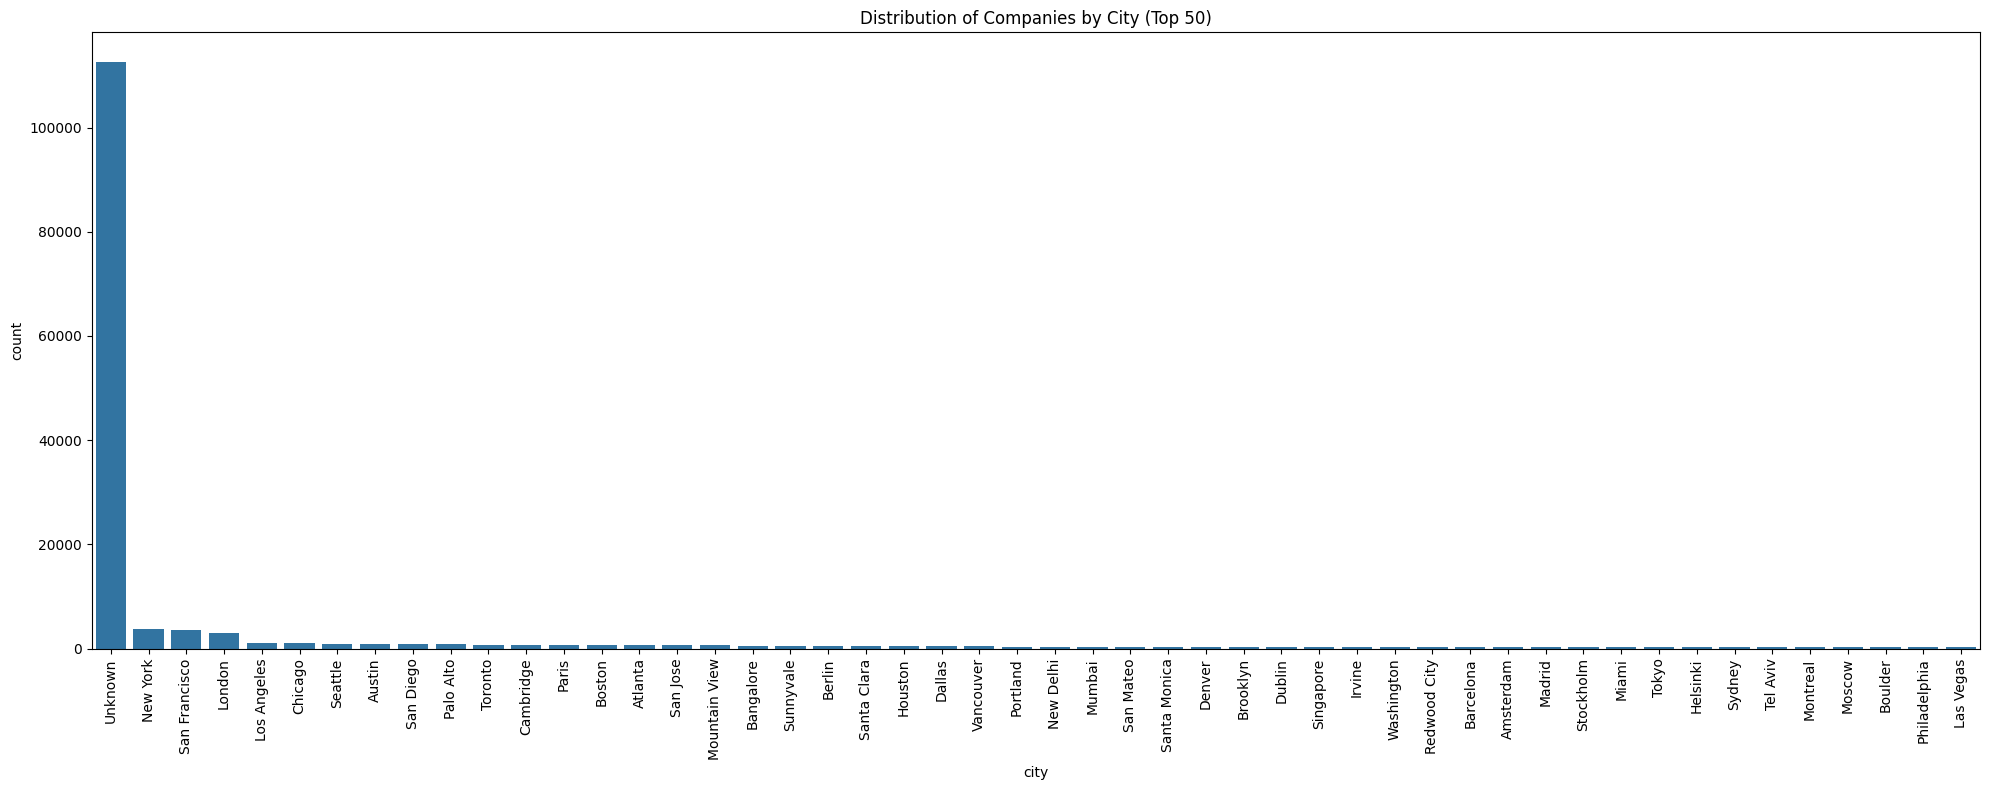

In [ ]:
# Distribution of companies by Country Code
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='country_code', order=df['country_code'].value_counts().index)
plt.title('Distribution of Companies by Country Code')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Distribution of companies by State Code
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='state_code', order=df['state_code'].value_counts().index)
plt.title('Distribution of Companies by State Code')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Distribution of companies by City (Show top N cities for better visualization)
# Get the top 50 most frequent cities
top_cities = df['city'].value_counts().nlargest(50).index

plt.figure(figsize=(20, 8))
sns.countplot(data=df[df['city'].isin(top_cities)], x='city', order=top_cities)
plt.title('Distribution of Companies by City (Top 50)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Analyze funding trends

### Subtask:
If funding data is available, visualize the distribution of funding amounts or the number of funding rounds to understand investment patterns.


**Reasoning**:
Check for the existence of 'funding_total_usd' and 'investment_rounds' columns and visualize their distributions if they exist, handling potential outliers for 'funding_total_usd' using a logarithmic scale if necessary.



In [ ]:
# Check if funding data is available and visualize
if 'funding_total_usd' in df.columns:
    plt.figure(figsize=(12, 6))
    # Handle potential outliers with a logarithmic scale
    sns.histplot(data=df, x='funding_total_usd', bins=50, log_scale=True)
    plt.title('Distribution of Total Funding Amounts (Log Scale)')
    plt.xlabel('Total Funding Amount (USD, Log Scale)')
    plt.ylabel('Number of Companies')
    plt.tight_layout()
    plt.show()

if 'investment_rounds' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='investment_rounds')
    plt.title('Distribution of Number of Investment Rounds')
    plt.xlabel('Number of Investment Rounds')
    plt.ylabel('Number of Companies')
    plt.tight_layout()
    plt.show()

## Investigate relationships and milestones

### Subtask:
Visualize the distribution of the number of relationships and milestones to see if there are any patterns or correlations with company success.


**Reasoning**:
Create histograms for 'relationships' and 'milestones' columns to visualize their distributions.



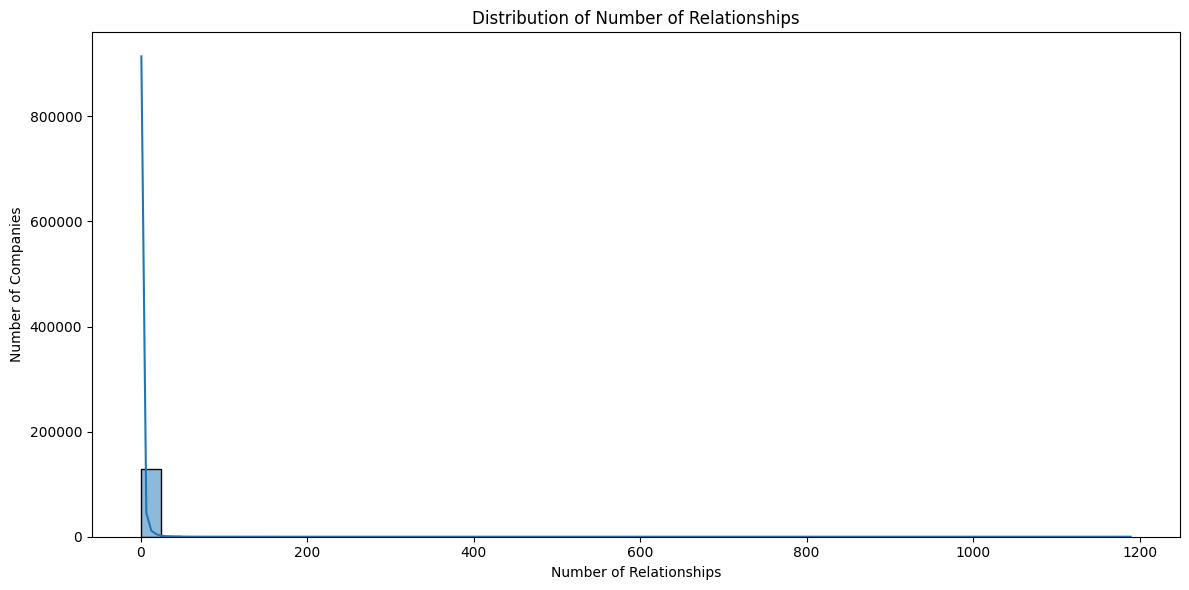

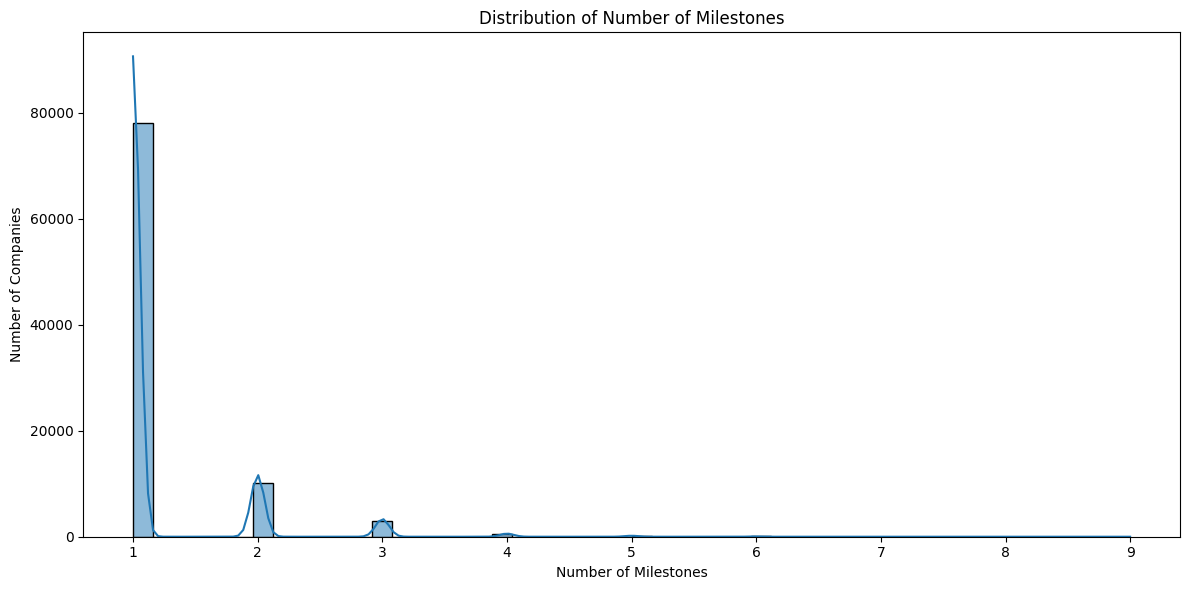

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='relationships', bins=50, kde=True)
plt.title('Distribution of Number of Relationships')
plt.xlabel('Number of Relationships')
plt.ylabel('Number of Companies')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='milestones', bins=50, kde=True)
plt.title('Distribution of Number of Milestones')
plt.xlabel('Number of Milestones')
plt.ylabel('Number of Companies')
plt.tight_layout()
plt.show()

## Extract insights

### Subtask:
Based on the visualizations, summarize the key findings and insights about the companies in the dataset.


## Summary:

### Data Analysis Key Findings

*   A large number of companies in the dataset are currently operating, followed by those that have been acquired, and then those that are closed.
*   The distribution of company category codes shows the most common industries or sectors represented in the dataset.
*   The geographical distribution visualizations indicate that the majority of companies are located in the United States, with specific states and cities showing higher concentrations.
*   The funding analysis reveals that a significant number of companies receive smaller funding amounts, and most companies have a relatively low number of investment rounds.
*   The distributions of the number of relationships and milestones show how these metrics are spread across the companies in the dataset.

### Insights or Next Steps

*   Investigate the relationship between company status and other factors like category code, location, funding, relationships, and milestones to identify potential predictors of success or failure.
*   Focus further analysis on the most prevalent category codes and geographical locations to understand the characteristics of successful startups in those areas.
